In [1]:
# Dependencies

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

#import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

import data_outcomes


## Pull in the Dataframe to work with. 
To pull ONLY the original data and rename the DiabetesPedigreeFunction to FamilyHistory just run:
``` data_outcomes.getDiabetesDataframe()```
To pull data with the columns with 0 values replaced with the mean run:
``` data_outcomes.getDiabetesDataframe(submeanaszero=True) ```

The decision was made to utilize a mean value for data listed as 0 in relevant columns rather than eliminate the records as the remaining bio markers were typically present and valid for evaluation of diabetes risk.


In [2]:
df_diabetes = data_outcomes.getDiabetesDataframe(submeanaszero=True)
display(df_diabetes)

----> Retrieving information for Resources/diabetes.csv
----> Renaming DiabetesPedigreeFunction column to FamilyHistory
----> Mean will be substituted for 0 values
----> 121 substituted for 0 values in Glucose
----> 72 substituted for 0 values in BloodPressure
----> 29 substituted for 0 values in SkinThickness
----> 155 substituted for 0 values in Insulin
----> 32 substituted for 0 values in BMI


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,FamilyHistory,Age,Outcome
0,6,148,72,35,155,33,0.627,50,1
1,1,85,66,29,155,26,0.351,31,0
2,8,183,64,29,155,23,0.672,32,1
3,1,89,66,23,94,28,0.167,21,0
4,0,137,40,35,168,43,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32,0.171,63,0
764,2,122,70,27,155,36,0.340,27,0
765,5,121,72,23,112,26,0.245,30,0
766,1,126,60,29,155,30,0.349,47,1


## Create and train the model


In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_diabetes[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','FamilyHistory','Age']], 
                                                    df_diabetes['Outcome'], 
                                                    test_size=0.3, 
                                                    random_state=42)

# Initialize the logistic regression model 
model = LogisticRegression() 
# # Fit the model to the training data 
model.fit(X_train, y_train)

# Make predictions on the test data 
y_pred = model.predict(X_test)

# Evaluate the model 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy:.2f}') 
# Classification report 
print("\nClassification Report:") 
print(classification_report(y_test, y_pred)) 
# Confusion matrix 
print("\nConfusion Matrix:") 
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


Confusion Matrix:
[[125  26]
 [ 33  47]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Plotting the values we are interested in. 

Plotting values that are most likely to have correlation and relevance across multiple bio markers for diabetes risk. 

## Pregnancy vs. Glucose

Evaluation shows a fairly scattered plot for pregnancy vs. glucose values.  Number of pregnancies does appear to be as relevant as glucose levels to diabetes risk prediction

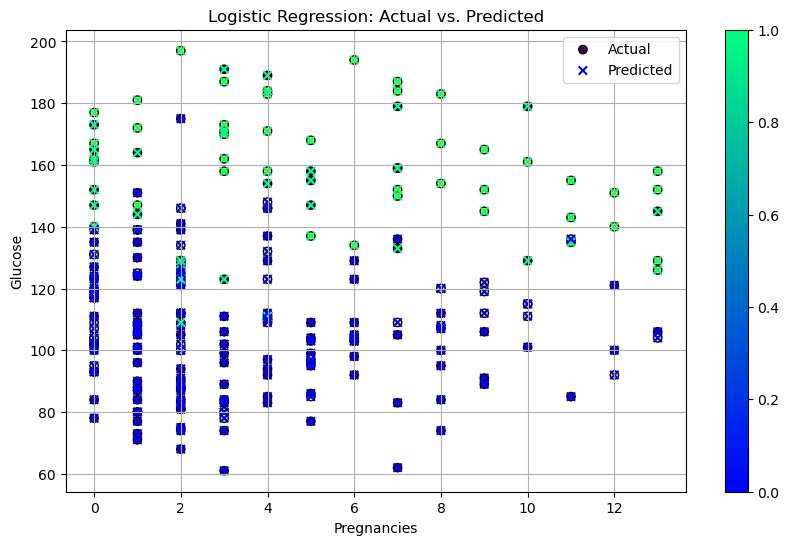

In [4]:
# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['Pregnancies'], X_test['Glucose'], c=y_test, marker='o', label='Actual', edgecolor='k') 
# Scatter plot for predicted values
plt.scatter(X_test['Pregnancies'], X_test['Glucose'], c=y_pred, marker='x', label='Predicted') 
# Adding the plot details 
plt.colorbar()
plt.set_cmap('winter')
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('Pregnancies') 
plt.ylabel('Glucose') 
plt.legend() 
plt.grid(True)

## Plotting the relationship between BMI and Age

Outcomes of BMI versus age seems to indicate that BMI becomes more relevant as a risk factor as age increases.  

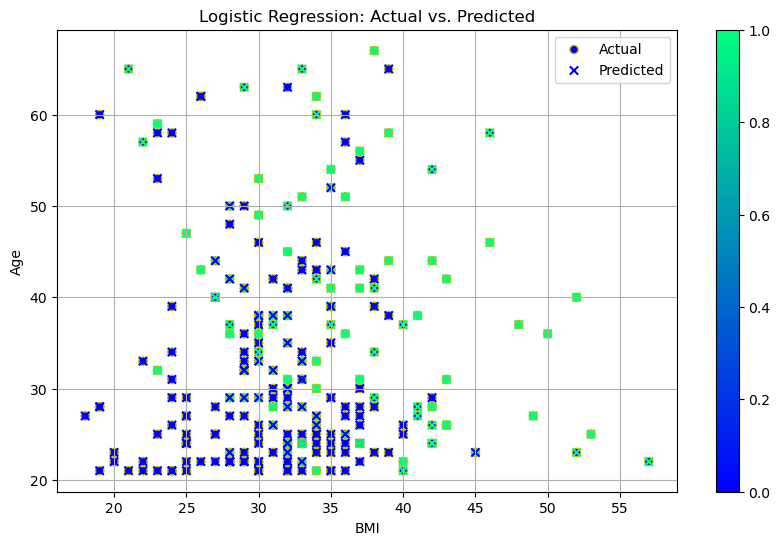

In [5]:
# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['BMI'], X_test['Age'], c=y_test, marker='o', label='Actual', edgecolor='y') 
# Scatter plot for predicted values
plt.scatter(X_test['BMI'], X_test['Age'], c=y_pred, marker='x', label='Predicted') 

plt.colorbar()
plt.set_cmap('winter')
# Adding the plot details 
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('BMI') 
plt.ylabel('Age') 
plt.legend() 
plt.grid(True)

## Plotting SkinThickness vs BMI

Based on the data evaluated Skin Thickness does not appear to have significant impact on diabetes risk, however BMI continues to be a potential risk factor.

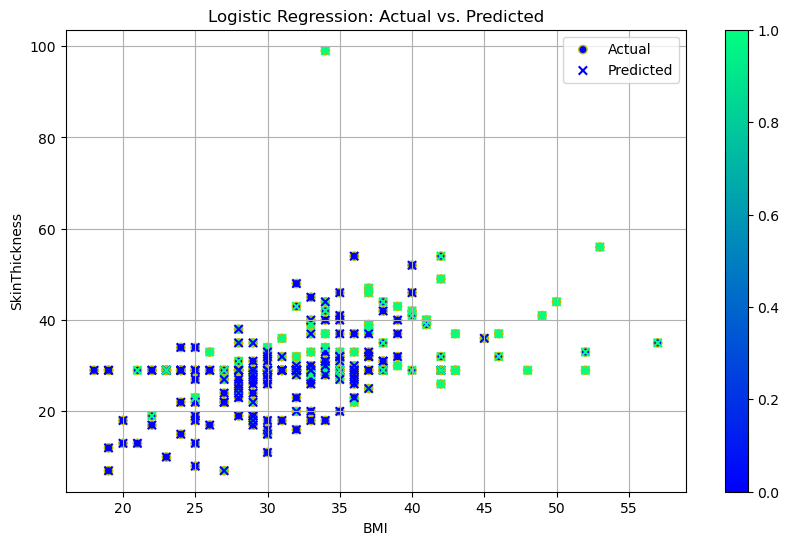

In [6]:
# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['BMI'], X_test['SkinThickness'], c=y_test, marker='o', label='Actual', edgecolor='y') 
# Scatter plot for predicted values
plt.scatter(X_test['BMI'], X_test['SkinThickness'], c=y_pred, marker='x', label='Predicted') 

plt.colorbar()
plt.set_cmap('winter')
# Adding the plot details 
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('BMI') 
plt.ylabel('SkinThickness') 
plt.legend() 
plt.grid(True)

### Blood Pressure vs BMI

Outcomes of BMI vs. Blood Pressure would indicate that both BMI and Blood Pressure may have some impact in the potential for diabetes.

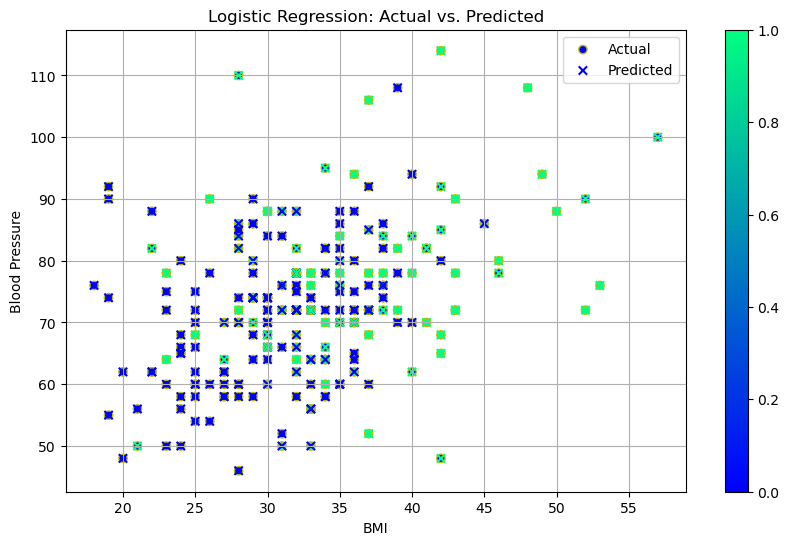

In [7]:
# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['BMI'], X_test['BloodPressure'], c=y_test, marker='o', label='Actual', edgecolor='y') 
# Scatter plot for predicted values
plt.scatter(X_test['BMI'], X_test['BloodPressure'], c=y_pred, marker='x', label='Predicted') 

plt.colorbar()
plt.set_cmap('winter')
# Adding the plot details 
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('BMI') 
plt.ylabel('Blood Pressure') 
plt.legend() 
plt.grid(True)

## Plotting BloodPressure and Age
Data outcomes for Blood Pressure vs ages indicates similar trends as BMI vs. age.   As age increases blood pressure increases as a potential risk factor

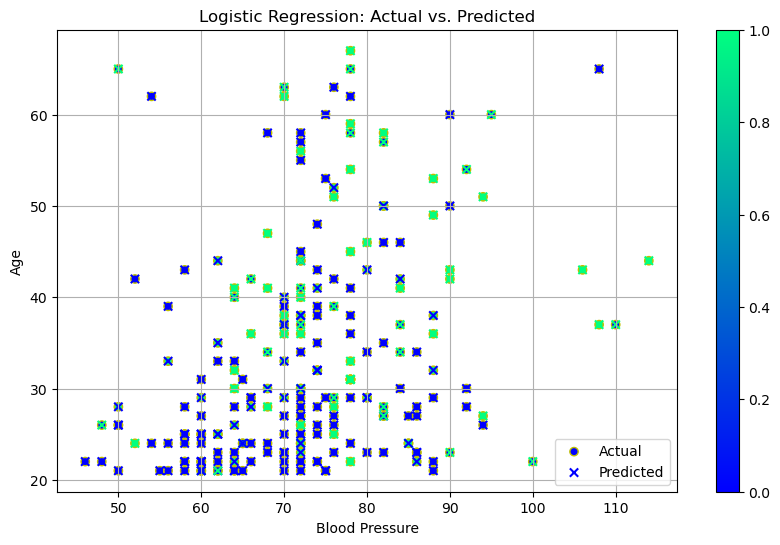

In [8]:
# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['BloodPressure'], X_test['Age'], c=y_test, marker='o', label='Actual', edgecolor='y') 
# Scatter plot for predicted values
plt.scatter(X_test['BloodPressure'], X_test['Age'], c=y_pred, marker='x', label='Predicted') 

plt.colorbar()
plt.set_cmap('winter')
# Adding the plot details 
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('Blood Pressure') 
plt.ylabel('Age') 
plt.legend() 
plt.grid(True)

## Plotting Glucose vs. Insulin
There is a clear relationship between high glucose levels and high insulin levels on the prediction of diabetes.  These values were the most impacted based on the data cleaning process which explains the anomoly noted as a horizontal line in the data. 

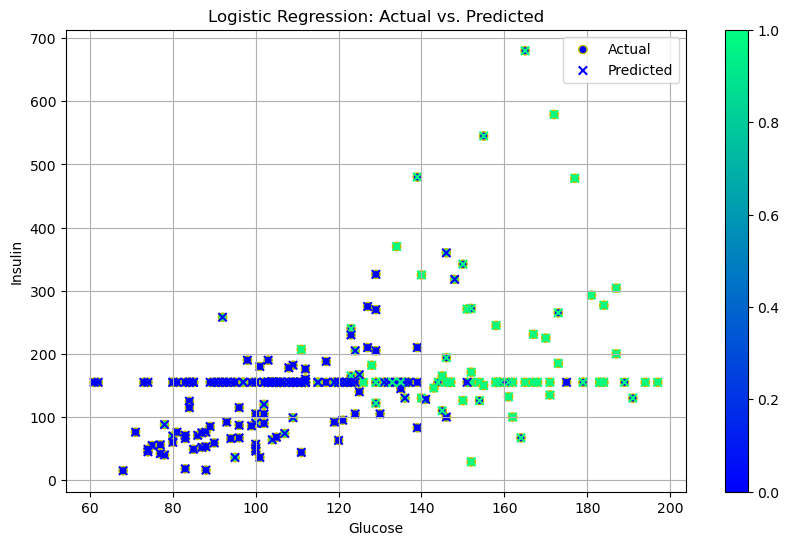

In [9]:
# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['Glucose'], X_test['Insulin'], c=y_test, marker='o', label='Actual', edgecolor='y') 
# Scatter plot for predicted values
plt.scatter(X_test['Glucose'], X_test['Insulin'], c=y_pred, marker='x', label='Predicted') 

plt.colorbar()
plt.set_cmap('winter')
# Adding the plot details 
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('Glucose') 
plt.ylabel('Insulin') 
plt.legend() 
plt.grid(True)

## Family History vs. Age, Blood Pressure and BMI

In evaluation of the data for the following 3 graphs shows that values for family history of diabetes is fairly well distributed.  However, prior indicators such as Blood Pressure, BMI and Age continue to be potentially impactful predictors of diabetes.  Given that this is a population of female Pima Indians genetic factors would not be as widely variable as they would in the general population.  This would indicate that the incidence of diabetes is likely more due to lifestyle factors over genetic predisposition.  

## Plotting FamilyHistory vs. Age

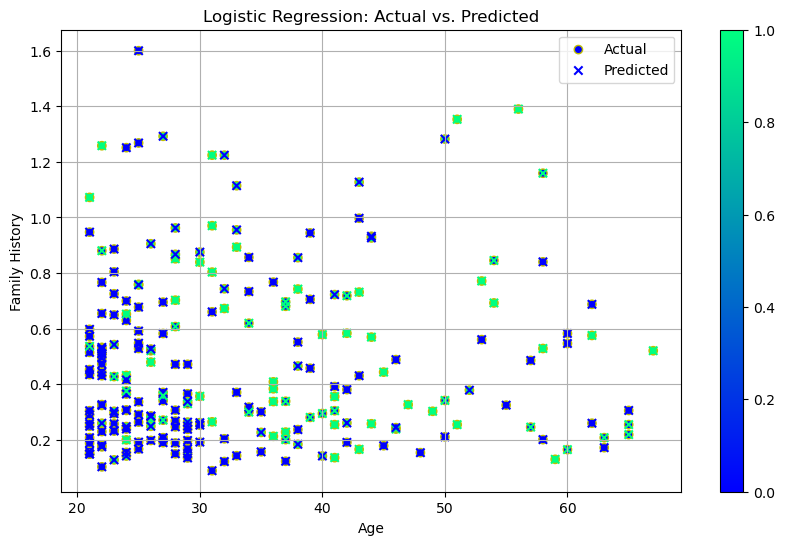

In [10]:
# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['Age'], X_test['FamilyHistory'], c=y_test, marker='o', label='Actual', edgecolor='y') 
# Scatter plot for predicted values
plt.scatter(X_test['Age'], X_test['FamilyHistory'], c=y_pred, marker='x', label='Predicted') 

plt.colorbar()
plt.set_cmap('winter')
# Adding the plot details 
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('Age') 
plt.ylabel('Family History') 
plt.legend() 
plt.grid(True)

## Family History vs Bloodpressure

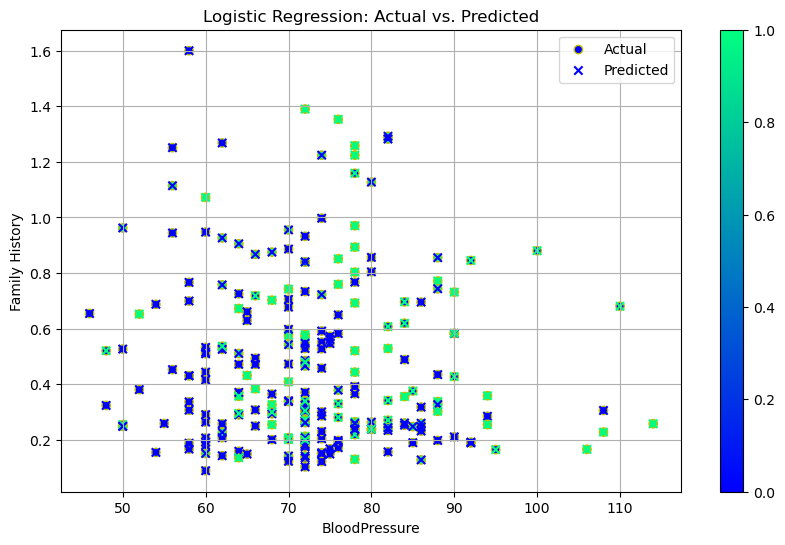

In [11]:
# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['BloodPressure'], X_test['FamilyHistory'], c=y_test, marker='o', label='Actual', edgecolor='y') 
# Scatter plot for predicted values
plt.scatter(X_test['BloodPressure'], X_test['FamilyHistory'], c=y_pred, marker='x', label='Predicted') 

plt.colorbar()
plt.set_cmap('winter')
# Adding the plot details 
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('BloodPressure') 
plt.ylabel('Family History') 
plt.legend() 
plt.grid(True)

## Family History vs BMI

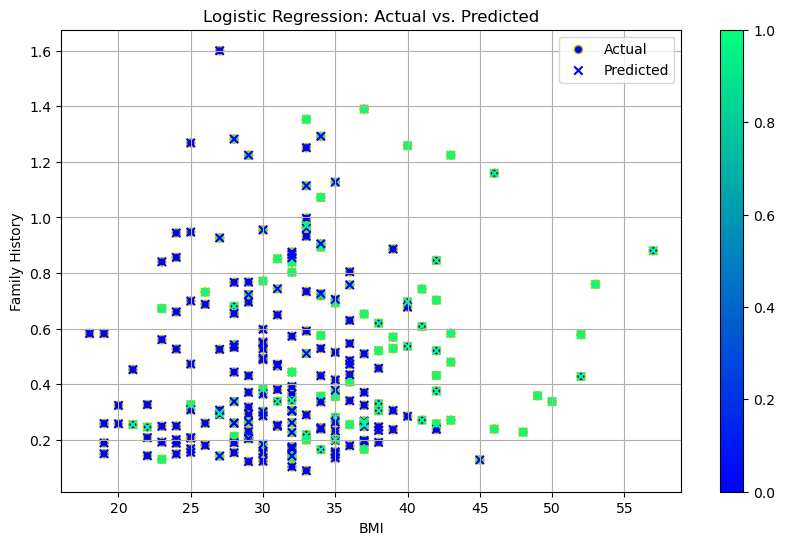

In [12]:
# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['BMI'], X_test['FamilyHistory'], c=y_test, marker='o', label='Actual', edgecolor='y') 
# Scatter plot for predicted values
plt.scatter(X_test['BMI'], X_test['FamilyHistory'], c=y_pred, marker='x', label='Predicted') 

plt.colorbar()
plt.set_cmap('winter')
# Adding the plot details 
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('BMI') 
plt.ylabel('Family History') 
plt.legend() 
plt.grid(True)